**Корректность проверена на Python 3.6:**
+ numpy 1.15.4
+ pandas 0.23.4

# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [2]:
import pandas as pd
import numpy as np
adver_data = pd.read_csv('advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [3]:
print(adver_data.head(5))

adver_data.corr()

      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


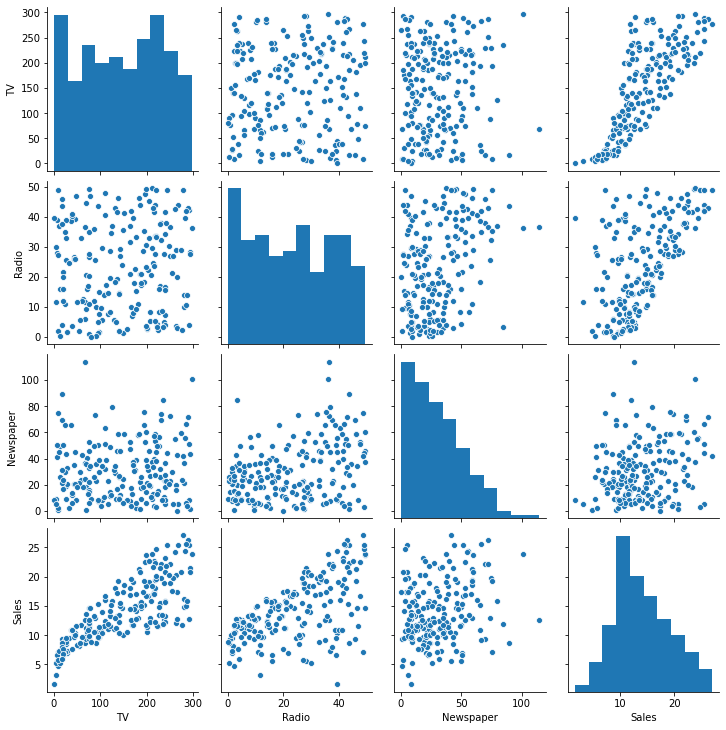

In [4]:
import seaborn as sns
sns.pairplot(adver_data)

**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [5]:
X = np.array([adver_data['TV'].values, adver_data['Radio'].values, adver_data['Newspaper'].values])
y = np.array(adver_data['Sales'].values)

**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [6]:
#?np.std
#X = np.array([[0,10,20],[-100,0,100]])

means = X.mean(axis=1)
stds = X.std(axis=1)

In [7]:
X_norm = [(X[i] - means[i]) / stds[i] for i in range(len(X))]
print(type(X_norm))

<class 'list'>


**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [8]:
import numpy as np
#X = np.hstack # Ваш код здесь
X_plus_ones = np.array([np.ones(len(X_norm[0])), X_norm[0], X_norm[1], X_norm[2]])


**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [9]:
import math

def mserror(y, y_pred):
    return math.sqrt(np.sum((y-y_pred) ** 2))


#test = np.array([0,1,0])
#test_pred = np.array([10,1,0])
#print(mserror(test, test_pred))

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'1 задание'.***

In [10]:
answer1 = mserror(y, np.array([y.mean()]*len(y)))
print(round(answer1, 3))

73.601


**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [11]:
def normal_equation(X, y):
    return np.linalg.pinv(X).dot(y)

In [12]:
X1 = np.array(X_plus_ones)
norm_eq_weights = normal_equation(X1.T, y)
print(norm_eq_weights)

[14.0225      3.91925365  2.79206274 -0.02253861]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Полученный результат, округленный до 3 знаков после запятой, является ответом на *'2 задание'*.**

In [13]:
answer2 = norm_eq_weights[0]
print(round(answer2, 3))

14.022


* Дополнительная проверка обычным методом оптимизации из предыдущего урока

In [19]:
def sqrt_err(w, X, y):
    if (len(w)  != len(X)):
        raise NameError('wrong arguments: x and y dimensions must match')
    
    X = X.T
    res = 0
    for i in range(len(X)):
        sum = 0
        for j in range(len(w)):
            sum += w[j]*X[i][j]
        res += (y[i] - sum) ** 2
        
    return res

def sqrt_err_w(w):
    return sqrt_err(w, X_plus_ones, y)

In [20]:
from scipy.optimize import minimize
bnds = ((-30, 30), (-30, 30), (-30, 30), (-30,30))
x0 = ((0,0,0,0))
res = minimize(sqrt_err_w, x0, bounds=bnds, method='L-BFGS-B')
print(res)

      fun: 556.8252629021945
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 9.09494627e-05,  0.00000000e+00, -2.27373677e-05, -1.13686838e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 50
      nit: 8
     njev: 10
   status: 0
  success: True
        x: array([14.02250017,  3.91925364,  2.79206269, -0.02253864])


### Это победа! Результат совпал!

**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [21]:
def linear_prediction(X, w):
    y = []
    X = X.T
    for i in range(len(X)):
        sum = w[0]
        for j in range(len(X[0])):
            sum += w[j+1] * X[i][j]
        y.append(sum)
    return y


y_pred = linear_prediction(np.array(X_norm), norm_eq_weights)

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения?
Полученный результат, округленный до 3 знаков после запятой, является ответом на *'3 задание'***

23.597


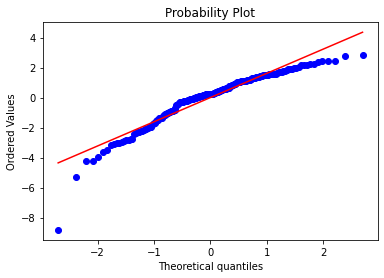

In [27]:
answer3 = mserror (y, y_pred)
print(round(answer3, 3))

err_vector = y-y_pred

from scipy import stats
import matplotlib.pyplot as plt

## QQ - plot, проверяет, нормально ли распределены остатки
res = stats.probplot(err_vector, plot=plt)


(array([0.0042893 , 0.        , 0.        , 0.0128679 , 0.03002511,
        0.08149673, 0.10294324, 0.26164739, 0.26593669, 0.09865393]),
 array([-8.8276871 , -7.66199613, -6.49630516, -5.33061419, -4.16492322,
        -2.99923225, -1.83354128, -0.66785031,  0.49784066,  1.66353163,
         2.8292226 ]),
 <a list of 10 Patch objects>)

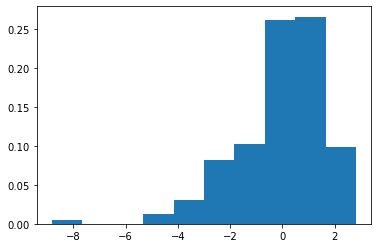

In [29]:
#гистограмма распределения остатков
plt.hist(err_vector, density=True)

**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

In [103]:
def stochastic_gradient_step(X_T, y, w, train_ind, eta=0.01):
    grad0 = 2 * X_T[train_ind][0] * (w.dot(X_T[train_ind]) - y[train_ind])
    grad1 = 2 * X_T[train_ind][1] * (w.dot(X_T[train_ind]) - y[train_ind])
    grad2 = 2 * X_T[train_ind][2] * (w.dot(X_T[train_ind]) - y[train_ind])
    grad3 = 2 * X_T[train_ind][3] * (w.dot(X_T[train_ind]) - y[train_ind])
    return  w - eta * np.array([grad0, grad1, grad2, grad3])


#X_T = X_plus_ones.T
#print(X_T[1][2])
#w_step = np.array([0,0,0,0])
#rs = stochastic_gradient_step(X_T, y, w_step, 1)
#print(rs)

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [104]:
def stochastic_gradient_descent(X_T, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X_T.shape[0])
        
        w_prew = w
        w = stochastic_gradient_step(X_T, y, w, random_ind, eta)
        
        #сохраняем ошибку для статистики (т.е. норму вектора ошибок)
        err = np.linalg.norm(y - w.dot(X_T[random_ind]))
        errors.insert(iter_num, err)
        iter_num +=1
        weight_dist = np.linalg.norm(w-w_prew)
        
    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [105]:
%%time

stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(
    X_plus_ones.T,
    y,
    np.array([0.0,0.0,0.0,0.0])
)


CPU times: user 277 ms, sys: 32.4 ms, total: 309 ms
Wall time: 291 ms


**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

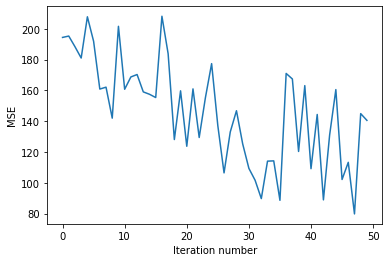

In [106]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

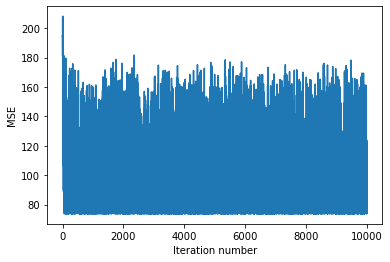

In [107]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [108]:
stoch_grad_desc_weights

array([14.18840901,  3.63310309,  2.84644722, -0.0299736 ])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [109]:
stoch_errors_by_iter[-1]

123.63071023309737

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'4 задание'*.**

In [110]:
answer4 = mserror (y, linear_prediction(np.array(X_norm), stoch_grad_desc_weights))
print(round(answer4, 3))

24.062
